<a href="https://colab.research.google.com/github/gautamHCSCV/Modelling_Viscoelastic_Objects/blob/main/Fractional_derivative_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
print(tf.__version__)

2.6.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Virtual env/Dataset4/'
x_train = pd.read_csv(path+'data_derivative_training.csv')
x_test = pd.read_csv(path+'data_derivative_testing.csv')
y_train = pd.read_csv(path+'data_force_output.csv')
y_test = pd.read_csv(path+'data_force_output_test.csv')
print(len(x_test),len(y_test),len(y_train))
x_train.head()

58223 58223 116447


,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
1,-0.025200,-0.039939,-0.063299,-0.100320,-0.159000,-0.252000,-0.399390,-0.632990,-1.003200,-1.59
2,-0.022680,-0.031951,-0.044309,-0.060193,-0.079500,-0.100800,-0.119820,-0.126600,-0.100320,0.00
3,-0.021546,-0.028756,-0.037663,-0.048155,-0.059625,-0.070559,-0.077881,-0.075959,-0.055177,0.00
4,0.004372,0.013100,0.029402,0.058588,0.109310,0.195550,0.339680,0.577290,0.964600,1.59


In [ ]:
y_train.head()

,-0.0499
0,-0.0502
1,-0.0333
2,-0.0201
3,-0.0295
4,-0.0105


# Deep Learning

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
inp = Input((10))
x = Dense(9,activation = 'relu')(inp)
x = Dense(12,activation = 'relu')(x)
x = Dense(1)(x)

model = Model(inputs = inp, outputs = x)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense (Dense)                (None, 9)                 99        
_________________________________________________________________
dense_1 (Dense)              (None, 12)                120       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 232
Trainable params: 232
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam', loss = 'mse')
his = model.fit(x_train,y_train, epochs=15, validation_data=(x_test,y_test))

Epoch 1/15
3639/3639 [==============================] - 8s 2ms/step - loss: 0.4713 - val_loss: 0.1685
Epoch 2/15
3639/3639 [==============================] - 8s 2ms/step - loss: 0.3686 - val_loss: 0.1446
Epoch 3/15
3639/3639 [==============================] - 6s 2ms/step - loss: 0.3630 - val_loss: 0.1667
Epoch 4/15
3639/3639 [==============================] - 8s 2ms/step - loss: 0.3606 - val_loss: 0.1713
Epoch 5/15
3639/3639 [==============================] - 7s 2ms/step - loss: 0.3593 - val_loss: 0.1481
Epoch 6/15
3639/3639 [==============================] - 7s 2ms/step - loss: 0.3581 - val_loss: 0.1627
Epoch 7/15
3639/3639 [==============================] - 8s 2ms/step - loss: 0.3578 - val_loss: 0.1723
Epoch 8/15
3639/3639 [==============================] - 8s 2ms/step - loss: 0.3566 - val_loss: 0.1623
Epoch 9/15
3639/3639 [==============================] - 7s 2ms/step - loss: 0.3566 - val_loss: 0.1503
Epoch 10/15
3639/3639 [==============================] - 8s 2ms/step - loss: 0.355

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
y1_pred = model.predict(x_test)
print('Root mean square error: ',sqrt(mean_squared_error(y_test,y1_pred)))

Root mean square error:  0.4076635887482669


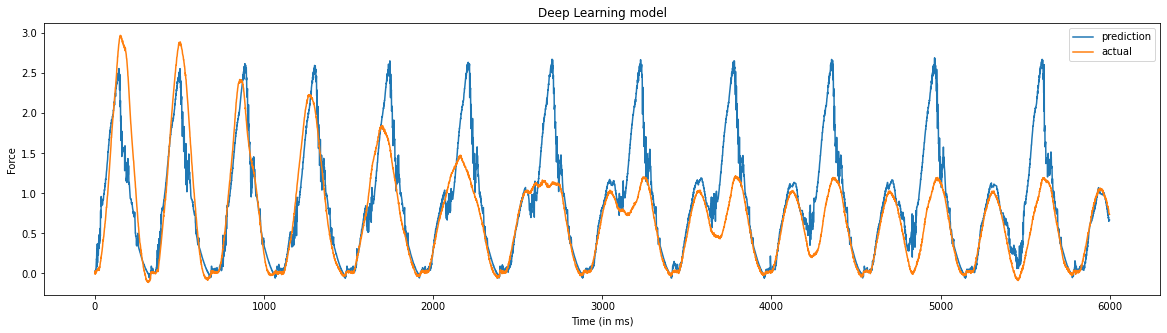

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(list(range(6000)),y1_pred[:6000], label = 'prediction')
plt.plot(list(range(6000)),y_test[:6000], label = 'actual')
plt.legend()
plt.xlabel('Time (in ms)')
plt.ylabel('Force')
plt.title('Deep Learning model')
plt.show()

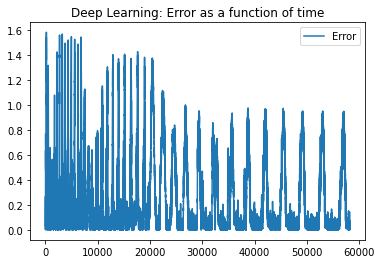

In [ ]:
error2 = []
for i in range(len(y_test)):
    error2.append(abs(y1_pred[i]-y_test.iloc[i,0]))
plt.plot(list(range(len(y1_pred))),error2, label = 'Error')
plt.legend()
plt.title('Deep Learning: Error as a function of time')
plt.show()

In [ ]:
print('Minimum Error =',min(error2))
print('Maximum Error =',max(error2))
error3 = sorted(error2)
print('Median Value of Error =',error3[len(error2)//2])

Minimum Error = [1.2516975e-06]
Maximum Error = [1.5812997]
Median Value of Error = [0.07491601]
